# Meteorites Landing Data Analysis

1. Retrive the data by calling NASA api
2. Add Country Code, Country Name and City Name
3. Save the Meteorites Landing Data to fine "meteorites_landing_raw_data.csv" file for the cleaning process

In [1]:
#Dependencies
import csv
import requests
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

In [2]:
from meteorites_data_retriever import meteorites_data_retriever


In [3]:
from meteorites_data_cleaner import meteorites_data_cleaner

### meteorites data retrieving process

In [ ]:
meteorites_raw_data = meteorites_data_retriever()
#meteorites_data.head()


### meteorites data cleaning process




In [ ]:
meteorites_data = meteorites_data_cleaner()


In [4]:
#Read server list from CSV file
meteorites_df = pd.read_csv('./Resources/meteorites_cleaned_data.csv')
meteorites_df.head()
#meteorites_df.count()

,Unnamed: 0,Unnamed: 0.1,name,id,mass,fall,reclat,reclong,geolocation,country_code,country_name,city_name,continent_name,material_column,years
0,0,0,Aachen,1,21.0,Fell,50.77500,6.08333,"{'latitude': '50.775', 'longitude': '6.08333'}",DE,Germany,Aachen,Europe,L5,1880-01-01
1,1,1,Aarhus,2,720.0,Fell,56.18333,10.23333,"{'latitude': '56.18333', 'longitude': '10.23333'}",DK,Denmark,Arhus,Europe,H6,1951-01-01
2,2,2,Abee,6,107000.0,Fell,54.21667,-113.00000,"{'latitude': '54.21667', 'longitude': '-113.0'}",CA,Canada,Lamont,Americas,EH4,1952-01-01
3,3,3,Acapulco,10,1914.0,Fell,16.88333,-99.90000,"{'latitude': '16.88333', 'longitude': '-99.9'}",MX,Mexico,Acapulco,Americas,Acapulcoite,1976-01-01
4,4,4,Achiras,370,780.0,Fell,-33.16667,-64.95000,"{'latitude': '-33.16667', 'longitude': '-64.95'}",AR,Argentina,Rio cuarto,Americas,L6,1902-01-01


### Plot meteorites fall density by continent_name

In [5]:
def plot_meteorites_fall_density():
    # Generate a pie plot showing the distribution of meteorites fall
    met_df = meteorites_df.groupby(["continent_name"]).count()
    met_df = met_df.reset_index()
    #Draw Pie chart
    mice_pie = met_df.plot.pie(y='id',labels=met_df['continent_name'], 
                               figsize=(5,5),autopct='%1.1f%%', title=("Meteorites fall Density Index")) 
    mice_pie.set_ylabel("Continent Name")

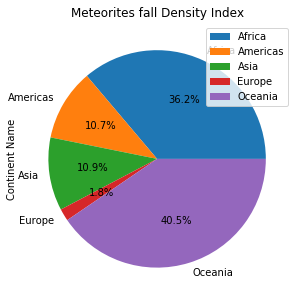

In [6]:
plot_meteorites_fall_density()

### Plot meteorites fall by year

In [7]:
def plot_meteorites_fall_by_year():
    #How many meteorites hit Earth each year?
    # Generate a bar plot showing number of data points for each treatment regimen using pandas

    meterorite_data = pd.DataFrame(meteorites_df, columns = ['id','years'])

    meterorite_data[['year', 'date']] = meterorite_data['years'].str.split("-", n = 1, expand = True)


    met_df = meterorite_data.groupby(["year"]).count()
    met_df.head(100)
    met_df = met_df.reset_index()
    met_df = met_df[met_df['year'] > '1950']


    met_df.plot.bar(x='year', y='id', facecolor="red", alpha=0.75, align="center", figsize=(20,5))
    plt.title("How many meteorites hit Earth each year")
    plt.xlabel('Drug Regimen')
    plt.ylabel('Tumor Volume (mm3)')
    plt.tight_layout()
    plt.show()

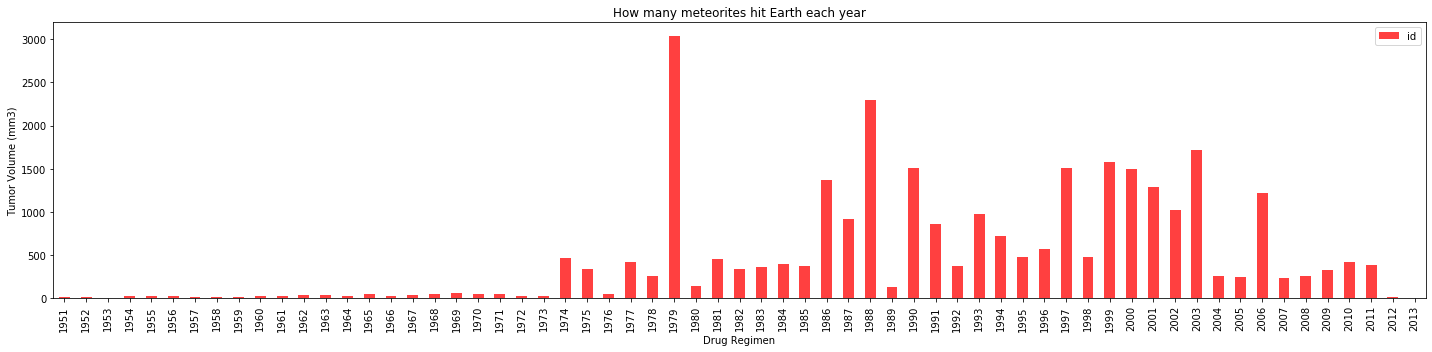

In [8]:
plot_meteorites_fall_by_year()

In [9]:
def biggest_meteorites_by_type():
    df_crunch = pd.DataFrame()
    df_crunch['size'] = meteorites_df .groupby('material_column')['mass'].mean()
    df_crunch.head()
#df_crunch['large']
    df_crunch['count'] = meteorites_df .groupby('material_column')['mass'].count()#.sort_values(ascending=False)#.plt.scatter()#(by='mass_in_grams',ascending=False)
    df_crunch.sort_values(by='size', ascending=False)
    df_crunch.head()
    df_crunch['material'] = df_crunch.index
    df_crunch.head(10)
    df_large = df_crunch['size'] > 200000
    df_crunch[df_large].plot.bar(x='material', y='size', facecolor="darkgreen", alpha=0.75, align="center", figsize=(20,5))
    plt.title("Largest average mass size by material")
    plt.xlabel('Meterorite Material')
    plt.ylabel('Mass (grams)')
    plt.tight_layout()
    plt.show()

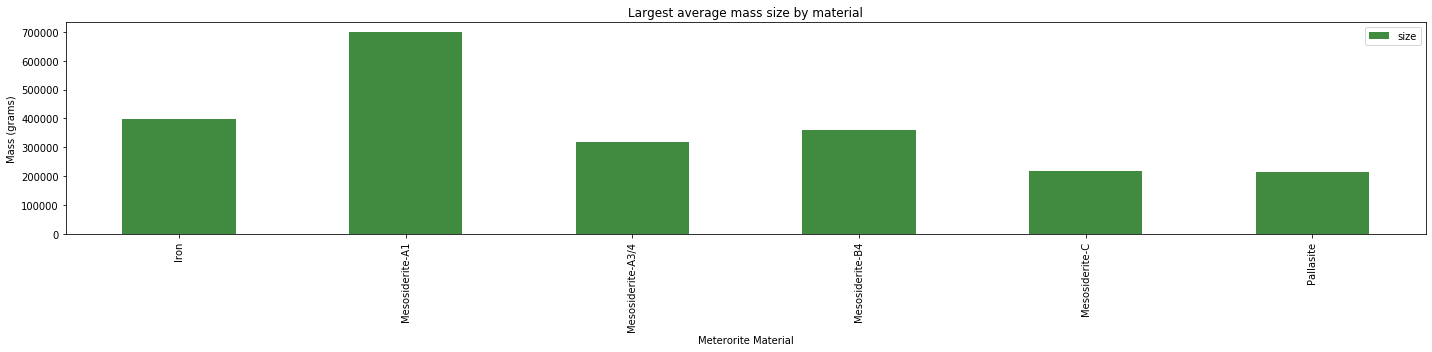

In [10]:
biggest_meteorites_by_type()

#

In [11]:
def scatterplot_size_kind():
    df_crunch = pd.DataFrame()
    df_crunch['size'] = meteorites_df.groupby('material_column')['mass'].mean()
    df_crunch.head()
#df_crunch['large']
    df_crunch['count'] = meteorites_df.groupby('material_column')['mass'].count()#.sort_values(ascending=False)#.plt.scatter()#(by='mass_in_grams',ascending=False)
    df_crunch.sort_values(by='size', ascending=False)
    df_crunch.head()
    df_crunch['material'] = df_crunch.index
    ax = df_crunch.plot(kind='scatter', x='count', y='size')
    ax.set_xlabel("Meteorite count grouped by material")
    # Set the y-axis label
    ax.set_ylabel("Meteorite size grouped by type")
    #df_crunch.plot.scatter(x='count', y='size')

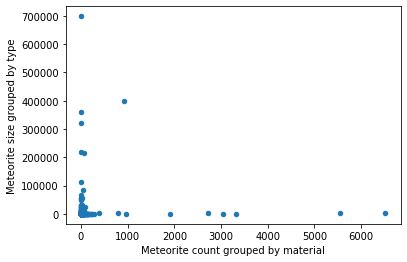

In [12]:
scatterplot_size_kind()

In [30]:
def pie_largest_fewest():
    df_crunch = pd.DataFrame()
    df_crunch['size'] = meteorites_df.groupby('material_column')['mass'].mean()
    df_crunch.head()
    #df_crunch['large']
    df_crunch['count'] = meteorites_df.groupby('material_column')['mass'].count()#.sort_values(ascending=False)#.plt.scatter()#(by='mass_in_grams',ascending=False)
    df_crunch.sort_values(by='size', ascending=False)
    #df_crunch.head()
    df_large_and_infrequent = (df_crunch['count'] < 250) & (df_crunch['size'] > 200000)
    met_pie = df_crunch[df_large_and_infrequent].plot.pie(y='count',labels=df_crunch[df_large_and_infrequent].index, 
                          figsize=(5,5),autopct='%1.1f%%', title=("Percetage of Rare and Large Meteorites")) 
    met_pie.set_ylabel("Material")

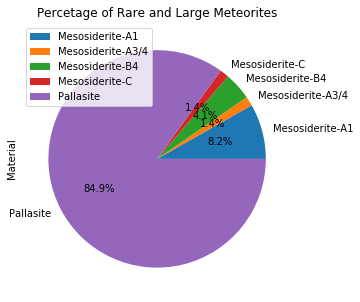

In [31]:
pie_largest_fewest()